In [19]:
import numpy as np
import math
from matplotlib import cm
from matplotlib import pyplot as plt
import matplotlib.ticker
import matplotlib.colors as mplc
import scipy
from scipy.interpolate import interp1d
from scipy import optimize
import pandas as pd
import os
import re
import datetime

In [20]:
files_list = []

for file in os.listdir('InSituB_SHJ'): ## Folder name
    if file.endswith(".xlsm"):
        files_list.append(file)
        
files_list.sort()
files_list.sort(key=lambda f: int(re.sub('\D', '', f)))

In [21]:
# time_stamp = []
pv = []
ref_suns = []
time_list= []
time_list_raw = []
c_voltage = []
e_suns = []
dn = []
teff = []

for i in range(len(files_list)):
# for i in range(3):
    pv.append(np.array(pd.read_excel('InSituB_SHJ/%s'%files_list[i], sheet_name = 'RawData', header = 1, index_col = None, usecols = str('B'), skiprows = 0, skipfooter = 0)).flatten())
    ref_suns.append(np.array(pd.read_excel('InSituB_SHJ/%s'%files_list[i], sheet_name = 'RawData', header = 1, index_col = None, usecols = str('D'), skiprows = 0, skipfooter = 0)).flatten())
    
    c_voltage.append(np.array(pd.read_excel('InSituB_SHJ/%s'%files_list[i], sheet_name = 'RawData', header = 1, index_col = None, usecols = str('F'), skiprows = 0, skipfooter = 0)).flatten())
    e_suns.append(np.array(pd.read_excel('InSituB_SHJ/%s'%files_list[i], sheet_name = 'RawData', header = 1, index_col = None, usecols = str('E'), skiprows = 0, skipfooter = 0)).flatten())
    
    dn.append(np.array(pd.read_excel('InSituB_SHJ/%s'%files_list[i], sheet_name = 'RawData', header = 1, index_col = None, usecols = str('I'), skiprows = 0, skipfooter = 0)).flatten())
    teff.append(np.array(pd.read_excel('InSituB_SHJ/%s'%files_list[i], sheet_name = 'RawData', header = 1, index_col = None, usecols = str('J'), skiprows = 0, skipfooter = 0)).flatten())
    
#     x = files_list[i].split('-')
#     time = np.array(x[4].split('.'))[0]
#     time2 = time.split('_')[1]
#     time_stamp.append(time2)
    
    time_meas = np.array(pd.read_excel('InSituB_SHJ/%s'%files_list[i], sheet_name = 'User', header = 1, index_col = None, usecols = str('I'), skiprows = 3, skipfooter = 43,dtype='str')).item()
    date_meas = np.array(pd.read_excel('InSituB_SHJ/%s'%files_list[i], sheet_name = 'User', header = 1, index_col = None, usecols = str('H'), skiprows = 3, skipfooter = 43, dtype='str')).item()
    t = time_meas
    d = date_meas.split(' ')[0]
    T = datetime.datetime.strptime( ' '.join([d, t]) , '%Y-%m-%d %H:%M:%S')
    time_list_raw.append(T)

In [51]:
ds = []
for i in range(len(files_list)):
    if i == 0:
        ds.append(0.9)
    else:
        ds.append(((time_list_raw[i] - time_list_raw[0]).seconds)+((time_list_raw[i] - time_list_raw[0]).days)*24*3600)

In [52]:
t1e15 = []
for i in range(len(files_list)):
    t_from_dn = interp1d(dn[i],teff[i], 'linear')
    t1e15.append((t_from_dn(1e15))*1e6)

In [53]:
v1sun = []
for i in range(len(files_list)):
    pv_from_suns = interp1d(e_suns[i],c_voltage[i], 'linear')
    v1sun.append(pv_from_suns(1))

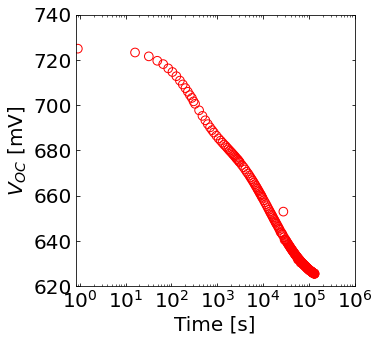

In [55]:
fig, ax = plt.subplots(1,1,figsize = (5,5))
plt.rcParams.update({'font.size': 20})

plt.scatter(ds,v1sun, marker = 'o', ls ='-', c = 'None', s = 75, edgecolor = 'r')
plt.xlim(0.8,1e6)
plt.ylim(0.62,0.74)

plt.xlabel('Time [s]')
plt.ylabel('$V_{OC}$ [mV]')
plt.semilogx()

ax.tick_params(which = 'both',direction="in",right=True, top=True, labelbottom = True)
x_major = matplotlib.ticker.LogLocator(base = 10.0, numticks = 5)
ax.xaxis.set_major_locator(x_major)
x_minor = matplotlib.ticker.LogLocator(base = 10.0, subs = np.arange(1.0, 10.0) * 0.1, numticks = 10)
ax.xaxis.set_minor_locator(x_minor)
ax.xaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())
plt.xticks([1e0,1e1,1e2,1e3,1e4,1e5,1e6])
plt.yticks([0.62,0.64,0.66,0.68,0.7,0.72,0.74],[620,640,660,680,700,720,740])

plt.show()

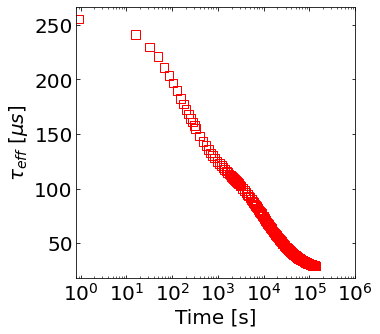

In [56]:
fig, ax = plt.subplots(1,1,figsize = (5,5))
plt.rcParams.update({'font.size': 20})

plt.scatter(ds,t1e15, marker = 's', ls ='-', c = 'None', s = 75, edgecolor = 'r')
plt.xlim(0.8,1e6)
# plt.ylim(0.62,0.74)

plt.xlabel('Time [s]')
plt.ylabel(r'$\tau_{eff}$ [$\mu s$]')
plt.semilogx()

ax.tick_params(which = 'both',direction="in",right=True, top=True, labelbottom = True)
x_major = matplotlib.ticker.LogLocator(base = 10.0, numticks = 5)
ax.xaxis.set_major_locator(x_major)
x_minor = matplotlib.ticker.LogLocator(base = 10.0, subs = np.arange(1.0, 10.0) * 0.1, numticks = 10)
ax.xaxis.set_minor_locator(x_minor)
ax.xaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())
plt.xticks([1e0,1e1,1e2,1e3,1e4,1e5,1e6])
# plt.yticks([0.62,0.64,0.66,0.68,0.7,0.72,0.74],[620,640,660,680,700,720,740])
plt.show()

# 

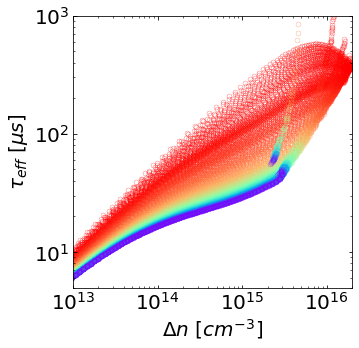

In [57]:
cc = np.array(ds).flatten()
scaled_cc = (cc - cc.min()) / cc.ptp()
colors = plt.cm.rainbow_r(scaled_cc)


fig, ax = plt.subplots(1,1,figsize = (5,5))
plt.rcParams.update({'font.size': 20})
for i in range(len(files_list)):
    plt.scatter(dn[i],teff[i]*1e6, marker='.', edgecolors=colors[i], s=0.25, linewidths=5)
    
plt.xlim(1e13,2e16)
plt.ylim(5,1e3)

plt.xlabel('$\Delta n$ [$cm^{-3}$]')
plt.ylabel(r'$\tau_{eff}$ [$\mu s$]')
plt.loglog()

ax.tick_params(which = 'both',direction="in",right=True, top=True, labelbottom = True)
x_major = matplotlib.ticker.LogLocator(base = 10.0, numticks = 5)
ax.xaxis.set_major_locator(x_major)
x_minor = matplotlib.ticker.LogLocator(base = 10.0, subs = np.arange(1.0, 10.0) * 0.1, numticks = 10)
ax.xaxis.set_minor_locator(x_minor)
ax.xaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())
# plt.xticks([1e0,1e1,1e2,1e3,1e4,1e5])
# plt.yticks([0.62,0.64,0.66,0.68,0.7,0.72,0.74],[620,640,660,680,700,720,740])

# norm = LogNorm(vmin = np.min(cc))
# scale = plt.colorbar(cm.ScalarMappable(norm = norm, cmap=plt.cm.rainbow),ticks = [1e1,1e2,1e3,1e4,1e5])
# # #scale.ax.set_yticklabels([73,74,75,76,77,78,79,80,81,82,83]) 
# scale.set_label('Temperature [K]', fontsize = 28)
plt.show()